<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0
Notebook id          : MNIST1
Run time             : Thursday 14 January 2021, 08:11:42
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/datasets/fidle
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

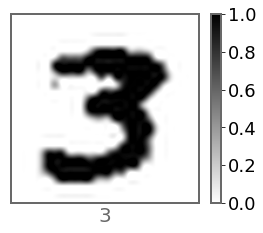

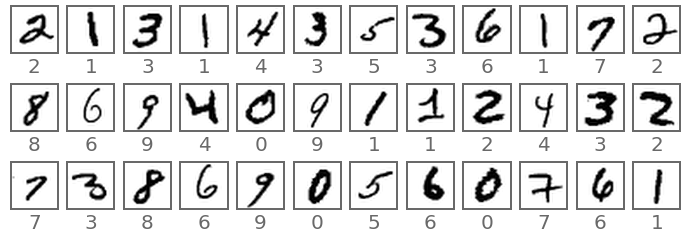

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 0s - loss: 2.3057 - accuracy: 0.1074

 14/118 [==>...........................] - ETA: 0s - loss: 1.8231 - accuracy: 0.5212

 28/118 [======>.......................] - ETA: 0s - loss: 1.3413 - accuracy: 0.6590

 42/118 [=========>....................] - ETA: 0s - loss: 1.0627 - accuracy: 0.7250

 56/118 [=============>................] - ETA: 0s - loss: 0.8963 - accuracy: 0.7657

 70/118 [================>.............] - ETA: 0s - loss: 0.7850 - accuracy: 0.7932

 84/118 [====================>.........] - ETA: 0s - loss: 0.7059 - accuracy: 0.8128

 98/118 [=======================>......] - ETA: 0s - loss: 0.6462 - accuracy: 0.8277

112/118 [===========================>..] - ETA: 0s - loss: 0.5996 - accuracy: 0.8391

118/118 [==============================] - 1s 5ms/step - loss: 0.5845 - accuracy: 0.8427 - val_loss: 0.2623 - val_accuracy: 0.9226


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.2776 - accuracy: 0.9062

 15/118 [==>...........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.9264

 29/118 [======>.......................] - ETA: 0s - loss: 0.2558 - accuracy: 0.9271

 43/118 [=========>....................] - ETA: 0s - loss: 0.2440 - accuracy: 0.9294

 57/118 [=============>................] - ETA: 0s - loss: 0.2356 - accuracy: 0.9324

 71/118 [=================>............] - ETA: 0s - loss: 0.2319 - accuracy: 0.9335

 85/118 [====================>.........] - ETA: 0s - loss: 0.2262 - accuracy: 0.9351

 99/118 [========================>.....] - ETA: 0s - loss: 0.2220 - accuracy: 0.9366

113/118 [===========================>..] - ETA: 0s - loss: 0.2181 - accuracy: 0.9378

118/118 [==============================] - 1s 4ms/step - loss: 0.2163 - accuracy: 0.9382 - val_loss: 0.1891 - val_accuracy: 0.9446


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.2315 - accuracy: 0.9434

 15/118 [==>...........................] - ETA: 0s - loss: 0.1841 - accuracy: 0.9471

 29/118 [======>.......................] - ETA: 0s - loss: 0.1805 - accuracy: 0.9489

 43/118 [=========>....................] - ETA: 0s - loss: 0.1746 - accuracy: 0.9504

 56/118 [=============>................] - ETA: 0s - loss: 0.1704 - accuracy: 0.9510

 70/118 [================>.............] - ETA: 0s - loss: 0.1677 - accuracy: 0.9518

 84/118 [====================>.........] - ETA: 0s - loss: 0.1661 - accuracy: 0.9521

 98/118 [=======================>......] - ETA: 0s - loss: 0.1634 - accuracy: 0.9528

113/118 [===========================>..] - ETA: 0s - loss: 0.1612 - accuracy: 0.9533

118/118 [==============================] - 0s 4ms/step - loss: 0.1603 - accuracy: 0.9535 - val_loss: 0.1489 - val_accuracy: 0.9560


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1128 - accuracy: 0.9746

 15/118 [==>...........................] - ETA: 0s - loss: 0.1480 - accuracy: 0.9590

 29/118 [======>.......................] - ETA: 0s - loss: 0.1364 - accuracy: 0.9630

 43/118 [=========>....................] - ETA: 0s - loss: 0.1375 - accuracy: 0.9623

 57/118 [=============>................] - ETA: 0s - loss: 0.1350 - accuracy: 0.9623

 71/118 [=================>............] - ETA: 0s - loss: 0.1353 - accuracy: 0.9618

 85/118 [====================>.........] - ETA: 0s - loss: 0.1339 - accuracy: 0.9621

 99/118 [========================>.....] - ETA: 0s - loss: 0.1313 - accuracy: 0.9627

114/118 [===========================>..] - ETA: 0s - loss: 0.1291 - accuracy: 0.9632

118/118 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.9632 - val_loss: 0.1295 - val_accuracy: 0.9602


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.0794 - accuracy: 0.9805

 17/118 [===>..........................] - ETA: 0s - loss: 0.1100 - accuracy: 0.9663

 33/118 [=======>......................] - ETA: 0s - loss: 0.1090 - accuracy: 0.9691

 49/118 [===========>..................] - ETA: 0s - loss: 0.1091 - accuracy: 0.9689

 64/118 [===============>..............] - ETA: 0s - loss: 0.1087 - accuracy: 0.9688

 79/118 [===================>..........] - ETA: 0s - loss: 0.1088 - accuracy: 0.9688

 95/118 [=======================>......] - ETA: 0s - loss: 0.1076 - accuracy: 0.9688

110/118 [==========================>...] - ETA: 0s - loss: 0.1084 - accuracy: 0.9687

118/118 [==============================] - 0s 4ms/step - loss: 0.1088 - accuracy: 0.9685 - val_loss: 0.1109 - val_accuracy: 0.9661


Epoch 6/16


  1/118 [..............................] - ETA: 0s - loss: 0.0888 - accuracy: 0.9785

 14/118 [==>...........................] - ETA: 0s - loss: 0.1022 - accuracy: 0.9694

 28/118 [======>.......................] - ETA: 0s - loss: 0.0975 - accuracy: 0.9711

 42/118 [=========>....................] - ETA: 0s - loss: 0.0946 - accuracy: 0.9720

 57/118 [=============>................] - ETA: 0s - loss: 0.0947 - accuracy: 0.9725

 72/118 [=================>............] - ETA: 0s - loss: 0.0961 - accuracy: 0.9721

 87/118 [=====================>........] - ETA: 0s - loss: 0.0952 - accuracy: 0.9723

102/118 [========================>.....] - ETA: 0s - loss: 0.0945 - accuracy: 0.9724

117/118 [============================>.] - ETA: 0s - loss: 0.0937 - accuracy: 0.9726

118/118 [==============================] - 0s 4ms/step - loss: 0.0936 - accuracy: 0.9727 - val_loss: 0.1040 - val_accuracy: 0.9688


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.1124 - accuracy: 0.9629

 15/118 [==>...........................] - ETA: 0s - loss: 0.0834 - accuracy: 0.9742

 29/118 [======>.......................] - ETA: 0s - loss: 0.0852 - accuracy: 0.9749

 43/118 [=========>....................] - ETA: 0s - loss: 0.0834 - accuracy: 0.9755

 57/118 [=============>................] - ETA: 0s - loss: 0.0848 - accuracy: 0.9753

 71/118 [=================>............] - ETA: 0s - loss: 0.0844 - accuracy: 0.9756

 85/118 [====================>.........] - ETA: 0s - loss: 0.0832 - accuracy: 0.9760

 99/118 [========================>.....] - ETA: 0s - loss: 0.0829 - accuracy: 0.9760

113/118 [===========================>..] - ETA: 0s - loss: 0.0822 - accuracy: 0.9760

118/118 [==============================] - 1s 4ms/step - loss: 0.0816 - accuracy: 0.9762 - val_loss: 0.0959 - val_accuracy: 0.9707


Epoch 8/16
  1/118 [..............................] - ETA: 0s - loss: 0.0853 - accuracy: 0.9766

 15/118 [==>...........................] - ETA: 0s - loss: 0.0697 - accuracy: 0.9799

 28/118 [======>.......................] - ETA: 0s - loss: 0.0666 - accuracy: 0.9801

 43/118 [=========>....................] - ETA: 0s - loss: 0.0683 - accuracy: 0.9800

 58/118 [=============>................] - ETA: 0s - loss: 0.0692 - accuracy: 0.9795

 74/118 [=================>............] - ETA: 0s - loss: 0.0703 - accuracy: 0.9791

 89/118 [=====================>........] - ETA: 0s - loss: 0.0706 - accuracy: 0.9792

105/118 [=========================>....] - ETA: 0s - loss: 0.0703 - accuracy: 0.9794

118/118 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9793 - val_loss: 0.0917 - val_accuracy: 0.9711


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0478 - accuracy: 0.9863

 15/118 [==>...........................] - ETA: 0s - loss: 0.0567 - accuracy: 0.9835

 29/118 [======>.......................] - ETA: 0s - loss: 0.0584 - accuracy: 0.9832

 44/118 [==========>...................] - ETA: 0s - loss: 0.0571 - accuracy: 0.9843

 59/118 [==============>...............] - ETA: 0s - loss: 0.0595 - accuracy: 0.9834

 75/118 [==================>...........] - ETA: 0s - loss: 0.0599 - accuracy: 0.9828

 91/118 [======================>.......] - ETA: 0s - loss: 0.0615 - accuracy: 0.9826

106/118 [=========================>....] - ETA: 0s - loss: 0.0614 - accuracy: 0.9823

118/118 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.9821 - val_loss: 0.0875 - val_accuracy: 0.9740


Epoch 10/16
  1/118 [..............................] - ETA: 0s - loss: 0.0317 - accuracy: 0.9922

 15/118 [==>...........................] - ETA: 0s - loss: 0.0553 - accuracy: 0.9857

 30/118 [======>.......................] - ETA: 0s - loss: 0.0565 - accuracy: 0.9852

 45/118 [==========>...................] - ETA: 0s - loss: 0.0551 - accuracy: 0.9848

 60/118 [==============>...............] - ETA: 0s - loss: 0.0544 - accuracy: 0.9846

 75/118 [==================>...........] - ETA: 0s - loss: 0.0554 - accuracy: 0.9843

 90/118 [=====================>........] - ETA: 0s - loss: 0.0557 - accuracy: 0.9843

105/118 [=========================>....] - ETA: 0s - loss: 0.0556 - accuracy: 0.9843

118/118 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9843 - val_loss: 0.0869 - val_accuracy: 0.9733


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0294 - accuracy: 0.9980

 15/118 [==>...........................] - ETA: 0s - loss: 0.0444 - accuracy: 0.9891

 29/118 [======>.......................] - ETA: 0s - loss: 0.0462 - accuracy: 0.9877

 43/118 [=========>....................] - ETA: 0s - loss: 0.0461 - accuracy: 0.9875

 57/118 [=============>................] - ETA: 0s - loss: 0.0460 - accuracy: 0.9873

 71/118 [=================>............] - ETA: 0s - loss: 0.0479 - accuracy: 0.9865

 85/118 [====================>.........] - ETA: 0s - loss: 0.0474 - accuracy: 0.9865

 99/118 [========================>.....] - ETA: 0s - loss: 0.0482 - accuracy: 0.9861

114/118 [===========================>..] - ETA: 0s - loss: 0.0487 - accuracy: 0.9859

118/118 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.9859 - val_loss: 0.0848 - val_accuracy: 0.9725


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0283 - accuracy: 0.9883

 15/118 [==>...........................] - ETA: 0s - loss: 0.0411 - accuracy: 0.9882

 30/118 [======>.......................] - ETA: 0s - loss: 0.0439 - accuracy: 0.9876

 46/118 [==========>...................] - ETA: 0s - loss: 0.0434 - accuracy: 0.9879

 62/118 [==============>...............] - ETA: 0s - loss: 0.0430 - accuracy: 0.9882

 77/118 [==================>...........] - ETA: 0s - loss: 0.0437 - accuracy: 0.9879

 93/118 [======================>.......] - ETA: 0s - loss: 0.0442 - accuracy: 0.9877

109/118 [==========================>...] - ETA: 0s - loss: 0.0440 - accuracy: 0.9877

118/118 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9876 - val_loss: 0.0823 - val_accuracy: 0.9732


Epoch 13/16


  1/118 [..............................] - ETA: 0s - loss: 0.0367 - accuracy: 0.9863



 16/118 [===>..........................] - ETA: 0s - loss: 0.0412 - accuracy: 0.9868

 31/118 [======>.......................] - ETA: 0s - loss: 0.0397 - accuracy: 0.9879

 46/118 [==========>...................] - ETA: 0s - loss: 0.0379 - accuracy: 0.9886

 61/118 [==============>...............] - ETA: 0s - loss: 0.0390 - accuracy: 0.9882

 76/118 [==================>...........] - ETA: 0s - loss: 0.0398 - accuracy: 0.9881

 91/118 [======================>.......] - ETA: 0s - loss: 0.0405 - accuracy: 0.9879

106/118 [=========================>....] - ETA: 0s - loss: 0.0400 - accuracy: 0.9879

118/118 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0821 - val_accuracy: 0.9745


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0312 - accuracy: 0.9922

 15/118 [==>...........................] - ETA: 0s - loss: 0.0346 - accuracy: 0.9914

 29/118 [======>.......................] - ETA: 0s - loss: 0.0347 - accuracy: 0.9908

 44/118 [==========>...................] - ETA: 0s - loss: 0.0348 - accuracy: 0.9906

 59/118 [==============>...............] - ETA: 0s - loss: 0.0338 - accuracy: 0.9909

 74/118 [=================>............] - ETA: 0s - loss: 0.0347 - accuracy: 0.9906

 89/118 [=====================>........] - ETA: 0s - loss: 0.0355 - accuracy: 0.9903

104/118 [=========================>....] - ETA: 0s - loss: 0.0357 - accuracy: 0.9902

118/118 [==============================] - 0s 4ms/step - loss: 0.0367 - accuracy: 0.9898 - val_loss: 0.0826 - val_accuracy: 0.9745


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0440 - accuracy: 0.9941

 15/118 [==>...........................] - ETA: 0s - loss: 0.0309 - accuracy: 0.9917

 29/118 [======>.......................] - ETA: 0s - loss: 0.0335 - accuracy: 0.9906

 43/118 [=========>....................] - ETA: 0s - loss: 0.0332 - accuracy: 0.9901

 57/118 [=============>................] - ETA: 0s - loss: 0.0327 - accuracy: 0.9904

 71/118 [=================>............] - ETA: 0s - loss: 0.0330 - accuracy: 0.9905

 85/118 [====================>.........] - ETA: 0s - loss: 0.0330 - accuracy: 0.9906

 99/118 [========================>.....] - ETA: 0s - loss: 0.0329 - accuracy: 0.9906

113/118 [===========================>..] - ETA: 0s - loss: 0.0327 - accuracy: 0.9906

118/118 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9907 - val_loss: 0.0758 - val_accuracy: 0.9769


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.0309 - accuracy: 0.9941

 14/118 [==>...........................] - ETA: 0s - loss: 0.0271 - accuracy: 0.9936

 29/118 [======>.......................] - ETA: 0s - loss: 0.0246 - accuracy: 0.9936

 44/118 [==========>...................] - ETA: 0s - loss: 0.0265 - accuracy: 0.9929

 59/118 [==============>...............] - ETA: 0s - loss: 0.0262 - accuracy: 0.9932

 75/118 [==================>...........] - ETA: 0s - loss: 0.0270 - accuracy: 0.9930

 91/118 [======================>.......] - ETA: 0s - loss: 0.0268 - accuracy: 0.9930

107/118 [==========================>...] - ETA: 0s - loss: 0.0274 - accuracy: 0.9928

118/118 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9926 - val_loss: 0.0800 - val_accuracy: 0.9756


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.0799570381641388
Test accuracy : 0.975600004196167


### 6.2 - Plot history

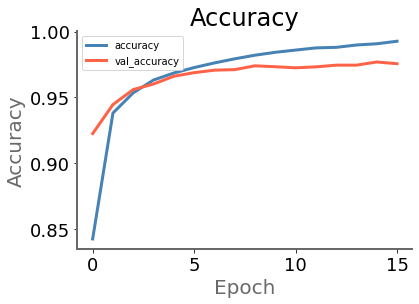

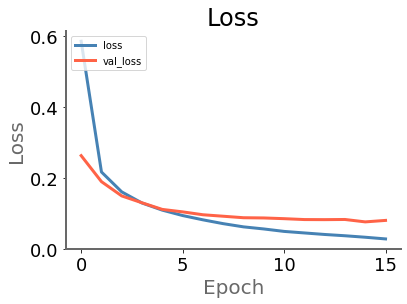

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

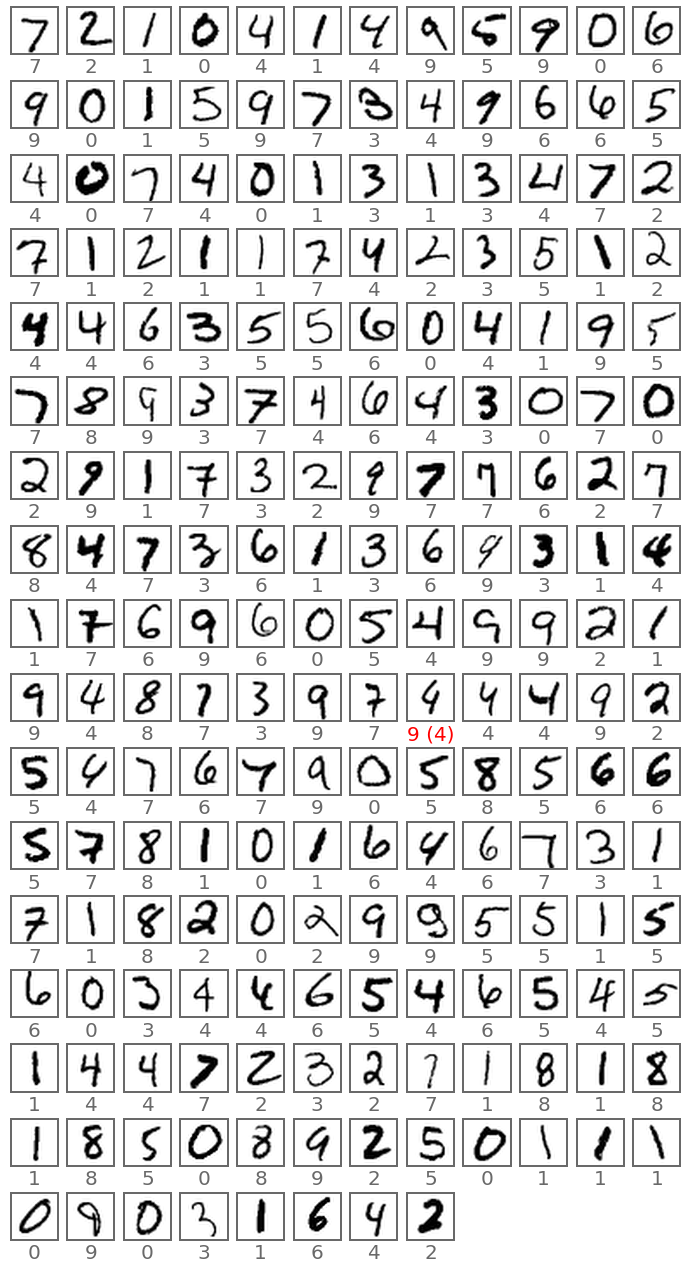

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

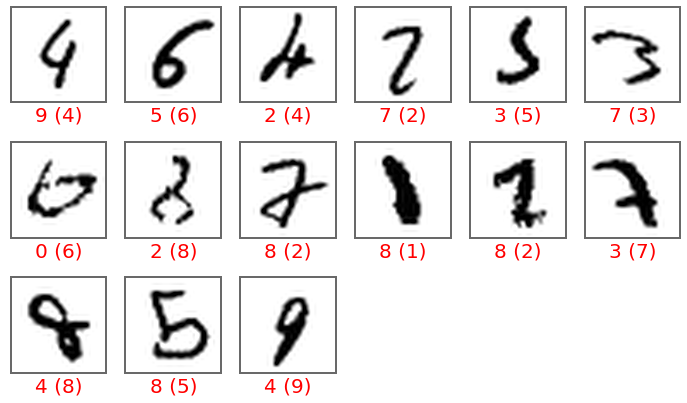

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

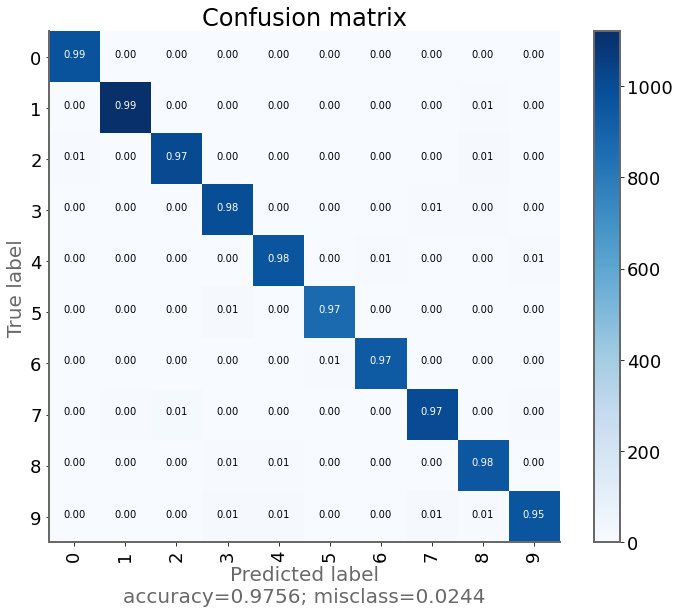

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Thursday 14 January 2021, 08:12:12
Duration is : 00:00:31 548ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>